In [1]:
# Loading modules for notebook and displaying at-runtime version
import sys
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import re
import nltk

print('Python version:             ',sys.version)
print('Pandas version:             ',pd.__version__)
print('Seaborn version:            ',sns.__version__)
print('Regular Expression Version: ', re.__version__)
print('NLTK Version:               ', nltk.__version__)

Python version:              3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Pandas version:              1.0.1
Seaborn version:             0.10.0
Regular Expression Version:  2.2.1
NLTK Version:                3.4.5


In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Description of Data Elements
```
 Variable               Definition
PassengerId      Disctinct passenger key
Survived         TARGET - Did they survive?
Pclass           Socio-Economic Class (3 lower, 2 middle, 1 upper)
Name             Passenger Name
Sex              Male / Female
Age              Passenger Age in Years
SibSp            Siblings/Spouses - count of family relations on board (brother/sister/step-/husband/wife)
Parch            Parents/Children - count of family relations on board (mother/father/son/daughter/step-)
Ticket           Ticket Number
Fare             Price of Ticket
Cabin            Cabin Assigned on Titanic
Embarked         Port Embarked from: (C = Cherbourg, Q = Queenstown, S = Southampton)
```

In [3]:
# make sex a numeric value
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1
df['Sex'] = pd.to_numeric(df['Sex'])

# high level data analysis
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## Identify last name and title. Split name into vector for further analysis if needed later

In [4]:
# creating vectorized name field without special characters
df_test = pd.read_csv('../data/test.csv')
df_names = df_test.append(df)
df_names.loc[:, 'Last Name'] = df_names['Name'].str.split(',').str[0].str.lower().str.strip()
df_names.loc[:, 'Last Name'] = [re.sub('[^a-z]+', ' ', str(s)) for s in df_names['Last Name']]
df_names.loc[:, 'Title'] = df_names['Name'].str.split(',').str[1].str.split('.').str[0].str.lower().str.strip()
df_names.loc[:, 'Name Vec'] = [re.sub('[^a-z]+', ' ', str(s)) for s in df_names['Name'].str.lower()]
df_names.loc[:, 'Name Vec'] = [re.sub(' +', ' ', str(s)) for s in df_names['Name Vec']]
df_names.loc[:, 'Name Vec'] = df_names['Name Vec'].apply(lambda x: nltk.word_tokenize(x))


df_names.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Last Name,Title,Name Vec
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,kelly,mr,"[kelly, mr, james]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,wilkes,mrs,"[wilkes, mrs, james, ellen, needs]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,myles,mr,"[myles, mr, thomas, francis]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,wirz,mr,"[wirz, mr, albert]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,hirvonen,mrs,"[hirvonen, mrs, alexander, helga, e, lindqvist]"


In [5]:
df_names['Title'].unique()

array(['mr', 'mrs', 'miss', 'master', 'ms', 'col', 'rev', 'dr', 'dona',
       'don', 'mme', 'major', 'lady', 'sir', 'mlle', 'capt',
       'the countess', 'jonkheer'], dtype=object)

In [6]:
df_names['Last Name'].unique()

array(['kelly', 'wilkes', 'myles', 'wirz', 'hirvonen', 'svensson',
       'connolly', 'caldwell', 'abrahim', 'davies', 'ilieff', 'jones',
       'snyder', 'howard', 'chaffee', 'del carlo', 'keane', 'assaf',
       'ilmakangas', 'assaf khalil', 'rothschild', 'olsen', 'flegenheim',
       'williams', 'ryerson', 'robins', 'ostby', 'daher', 'brady',
       'samaan', 'louch', 'jefferys', 'dean', 'johnston', 'mock',
       'katavelas', 'roth', 'cacic', 'sap', 'hee', 'karun', 'franklin',
       'goldsmith', 'corbett', 'kimball', 'peltomaki', 'chevre',
       'shaughnessy', 'bucknell', 'coutts', 'smith', 'pulbaum', 'hocking',
       'fortune', 'mangiavacchi', 'rice', 'cor', 'abelseth', 'davison',
       'chaudanson', 'dika', 'mccrae', 'bjorklund', 'bradley', 'corey',
       'burns', 'moore', 'tucker', 'mulvihill', 'minkoff', 'nieminen',
       'ovies y rodriguez', 'geiger', 'keeping', 'miles', 'cornell',
       'aldworth', 'doyle', 'boulos', 'straus', 'case', 'demetri', 'lamb',
       'khalil'

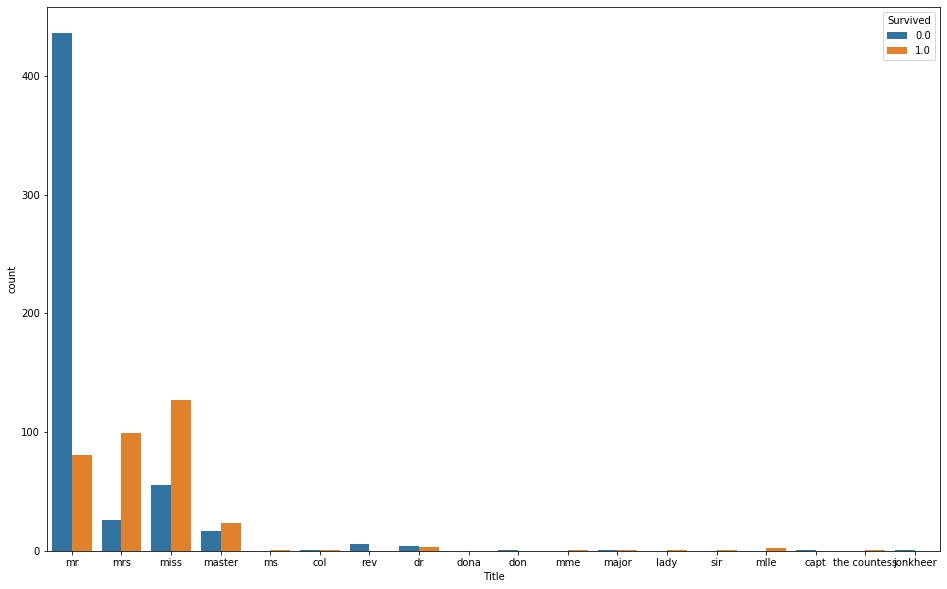

In [7]:
# names accounted for in both test and train effectively

fig, ax = pyplot.subplots(figsize=(16,10))
sns.countplot(ax= ax, x = 'Title', hue = 'Survived', data = df_names)